Basic pipeline

1. Design a model
2. Construct loss and optimizer
3. Train model
    1. forward pass: compute predictions
    2. backward pass: gradients
    3. update weights

In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

sns.set()

In [24]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = n_features

lr = 0.01
num_epochs = 200

In [25]:
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [26]:
for epoch in range(1, num_epochs + 1):
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"{epoch = }, loss = {loss.item():.3f}")

epoch = 10, loss = 4298.824
epoch = 20, loss = 3209.418
epoch = 30, loss = 2421.082
epoch = 40, loss = 1850.006
epoch = 50, loss = 1435.910
epoch = 60, loss = 1135.371
epoch = 70, loss = 917.066
epoch = 80, loss = 758.371
epoch = 90, loss = 642.927
epoch = 100, loss = 558.893
epoch = 110, loss = 497.685
epoch = 120, loss = 453.080
epoch = 130, loss = 420.557
epoch = 140, loss = 396.833
epoch = 150, loss = 379.519
epoch = 160, loss = 366.880
epoch = 170, loss = 357.650
epoch = 180, loss = 350.907
epoch = 190, loss = 345.979
epoch = 200, loss = 342.377


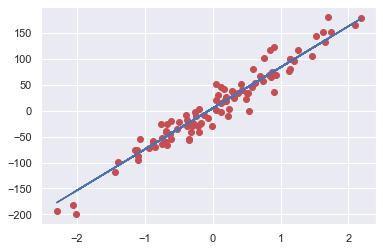

In [27]:
pred = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, pred, "b")
plt.show()